In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

compare different days and different time

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
class dataproc:
  """A simple class for ranking detectors by speed and occupancy"""
  def __init__(self,path):
    self.path = path
    self.n = 1
    self.days = [2,3]

  def read_csv_format(self):
    df = pd.read_csv(self.path)
    df['datetime'] = pd.to_datetime(df['datetime'])

    return df

  def pick_random(self):
    # df is dataframe
    # n is the number of detectors to filter
    df = self.read_csv_format()
    unique_detectors = df['detector_id'].unique()
    select_detectors = random.sample(unique_detectors.tolist(),self.n)
    df_filter = df[df['detector_id'].isin(select_detectors)]
    return df_filter


  def visualize(self, df):
    return df['occupancy'].plot.hist(), df.plot(x='datetime',y='occupancy')

  def split_data(self,df):
    df['day'] = df['datetime'].dt.day
    df['hour']= df['datetime'].dt.hour
    df = df[(df['hour']>=6) & (df['hour']<=20) ]
    return df[df['day']==self.days[0]],df[df['day']==self.days[1]]


In [5]:
path = '/content/drive/MyDrive/3semester/8160/hw2/Copy of delay_bottleneck.csv'
dp = dataproc(path)

In [16]:
df = dp.read_csv_format()

In [17]:
df.tail()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat
894820,MR367S001.7D,367,South,2.5,2017-09-07 23:29:00,39.925926,1.296296,1.222222,0.083,-90.231247,38.819611
894821,MR367S001.7D,367,South,2.5,2017-09-07 23:34:00,40.355556,1.192593,1.170370,0.083,-90.231247,38.819611
894822,MR367S001.7D,367,South,2.5,2017-09-07 23:39:00,41.511111,1.392593,1.281481,0.083,-90.231247,38.819611
894823,MR367S001.7D,367,South,2.0,2017-09-07 23:59:00,56.000000,1.000000,1.000000,0.000,-90.231247,38.819611
894824,MR367S001.7D,367,South,2.5,2017-09-07 23:59:00,41.000000,1.000000,1.000000,0.083,-90.231247,38.819611


In [18]:
#Detect
df_grp = df.groupby("detector_id").size().reset_index(name="cnt")
df_grp["idx"] = df_grp.index
detector_id_dict = df_grp.to_dict()["detector_id"]
print(detector_id_dict)

{0: 'MI064E009.1D', 1: 'MI064E009.8D', 2: 'MI064E011.2D', 3: 'MI064E012.8D', 4: 'MI064E013.6D', 5: 'MI064E015.2D', 6: 'MI064E016.3D', 7: 'MI064E017.0D', 8: 'MI064E018.1D', 9: 'MI064E018.9D', 10: 'MI064E021.9D', 11: 'MI064E023.2D', 12: 'MI064E024.2D', 13: 'MI064W009.2D', 14: 'MI064W010.0D', 15: 'MI064W011.1D', 16: 'MI064W012.8D', 17: 'MI064W013.6D', 18: 'MI064W015.1D', 19: 'MI064W015.9D', 20: 'MI064W017.0D', 21: 'MI064W017.9D', 22: 'MI064W018.4D', 23: 'MI064W018.9D', 24: 'MI064W020.2D', 25: 'MI064W021.9D', 26: 'MI070E204.0D', 27: 'MI070E204.9D', 28: 'MI070E206.0D', 29: 'MI070E208.5D', 30: 'MI070E209.6D', 31: 'MI070E210.0D', 32: 'MI070E212.2D', 33: 'MI070E212.9D', 34: 'MI070E214.2D', 35: 'MI070E215.2D', 36: 'MI070E216.3D', 37: 'MI070E217.1D', 38: 'MI070E218.2D', 39: 'MI070E219.1D', 40: 'MI070E220.5D', 41: 'MI070E221.4D', 42: 'MI070E222.2D', 43: 'MI070E222.6D', 44: 'MI070E223.9D', 45: 'MI070E225.4D', 46: 'MI070E226.1D', 47: 'MI070E227.2D', 48: 'MI070E228.6D', 49: 'MI070E229.6D', 50: 'MI07

In [21]:
{v:k for k,v in detector_id_dict.items()}

{'MI064E009.1D': 0,
 'MI064E009.8D': 1,
 'MI064E011.2D': 2,
 'MI064E012.8D': 3,
 'MI064E013.6D': 4,
 'MI064E015.2D': 5,
 'MI064E016.3D': 6,
 'MI064E017.0D': 7,
 'MI064E018.1D': 8,
 'MI064E018.9D': 9,
 'MI064E021.9D': 10,
 'MI064E023.2D': 11,
 'MI064E024.2D': 12,
 'MI064W009.2D': 13,
 'MI064W010.0D': 14,
 'MI064W011.1D': 15,
 'MI064W012.8D': 16,
 'MI064W013.6D': 17,
 'MI064W015.1D': 18,
 'MI064W015.9D': 19,
 'MI064W017.0D': 20,
 'MI064W017.9D': 21,
 'MI064W018.4D': 22,
 'MI064W018.9D': 23,
 'MI064W020.2D': 24,
 'MI064W021.9D': 25,
 'MI070E204.0D': 26,
 'MI070E204.9D': 27,
 'MI070E206.0D': 28,
 'MI070E208.5D': 29,
 'MI070E209.6D': 30,
 'MI070E210.0D': 31,
 'MI070E212.2D': 32,
 'MI070E212.9D': 33,
 'MI070E214.2D': 34,
 'MI070E215.2D': 35,
 'MI070E216.3D': 36,
 'MI070E217.1D': 37,
 'MI070E218.2D': 38,
 'MI070E219.1D': 39,
 'MI070E220.5D': 40,
 'MI070E221.4D': 41,
 'MI070E222.2D': 42,
 'MI070E222.6D': 43,
 'MI070E223.9D': 44,
 'MI070E225.4D': 45,
 'MI070E226.1D': 46,
 'MI070E227.2D': 47,
 '

In [ ]:
# map the accidence to differnt value

(<Axes: ylabel='Frequency'>, <Axes: xlabel='datetime'>)

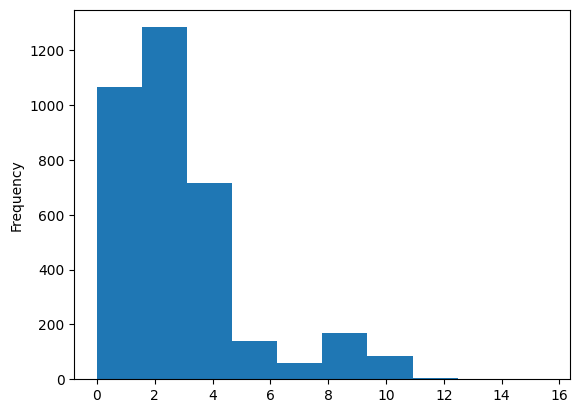

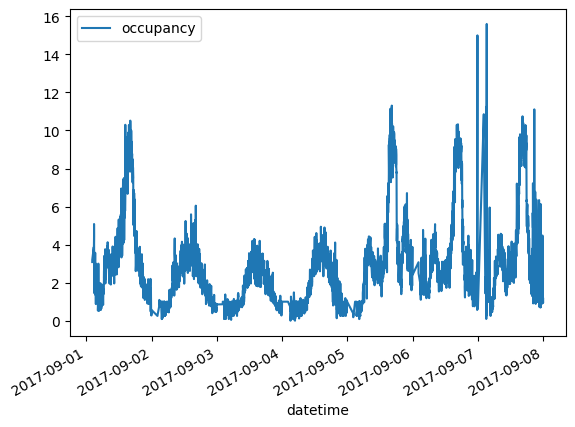

In [9]:
dp.visualize(df)

## Stationarity

In [1]:
[df1,df2] = dp.split_data(df)

NameError: name 'dp' is not defined

In [15]:
df1.tail()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat,day,hour
76242,MI064W015.9D,64,West,16.2,2017-09-02 20:34:00,66.434343,3.535354,1.676768,0.0,-90.6063,38.6712,2,20
76243,MI064W015.9D,64,West,15.7,2017-09-02 20:39:00,65.083333,2.576389,1.565972,0.0,-90.6063,38.6712,2,20
76244,MI064W015.9D,64,West,16.2,2017-09-02 20:39:00,65.969697,2.363636,1.181818,0.0,-90.6063,38.6712,2,20
76245,MI064W015.9D,64,West,15.7,2017-09-02 20:59:00,63.104167,2.298611,1.128472,0.0,-90.6063,38.6712,2,20
76246,MI064W015.9D,64,West,16.2,2017-09-02 20:59:00,64.963636,1.909091,0.909091,0.0,-90.6063,38.6712,2,20


In [16]:
df2.tail()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat,day,hour
76743,MI064W015.9D,64,West,16.2,2017-09-03 20:34:00,66.208264,3.583471,1.948760,0.0,-90.6063,38.6712,3,20
76744,MI064W015.9D,64,West,15.7,2017-09-03 20:39:00,63.250000,2.444444,1.361111,0.0,-90.6063,38.6712,3,20
76745,MI064W015.9D,64,West,16.2,2017-09-03 20:39:00,66.134199,2.865801,1.272727,0.0,-90.6063,38.6712,3,20
76746,MI064W015.9D,64,West,15.7,2017-09-03 20:59:00,64.165179,2.517857,1.357143,0.0,-90.6063,38.6712,3,20
76747,MI064W015.9D,64,West,16.2,2017-09-03 20:59:00,66.454545,2.484848,1.030303,0.0,-90.6063,38.6712,3,20


<Axes: ylabel='Frequency'>

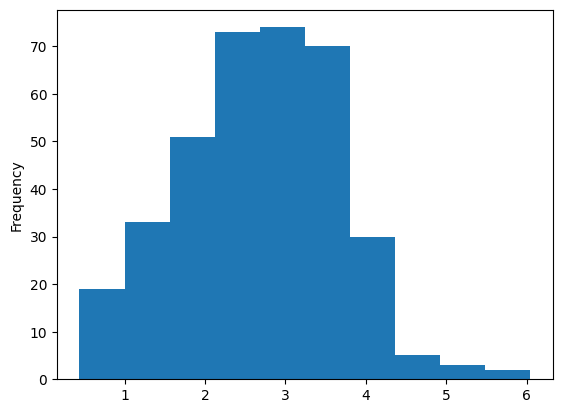

In [17]:
df1['occupancy'].plot.hist()

<Axes: ylabel='Frequency'>

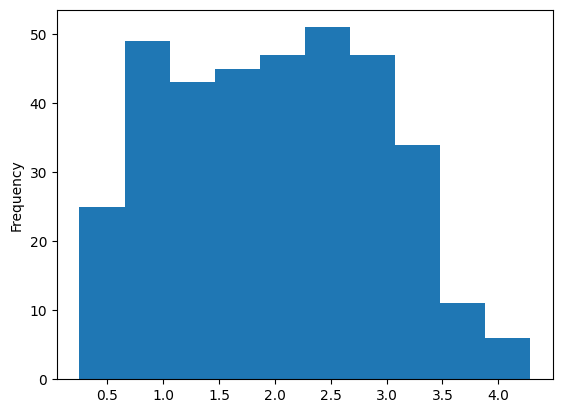

In [18]:
df2['occupancy'].plot.hist()

In [19]:
print ('means of both datasets')
print (df1['occupancy'].mean(),df2['occupancy'].mean())
print ('\nvariance between both datasets')
print (df1['occupancy'].var(),df2['occupancy'].var())

means of both datasets
2.670247249593842 2.0197067816243166

variance between both datasets
0.9866564747056566 0.8446216282967248


##Use Dicker fuller test to test for significance

---



In [20]:
def cor_coeff(df1, df2,column):
  mu1,std1 = df1[column].values.mean(), df1[column].values.std()
  mu2, std2 = df2[column].values.mean(), df2[column].values.std()

  xcor,ycor = (df1[column]-mu1).values, (df2[column]-mu2).values
  if not (len(xcor) == len(ycor)):
    xcor = np.resize(xcor,ycor.shape)

  x_comp = np.divide(xcor,std1)
  y_comp = np.divide(ycor,std2)

  numerator = np.sum(np.multiply(xcor,ycor))
  denominator = np.sqrt((np.sum(xcor**2)*np.sum(ycor**2)))
  coeff = numerator/denominator

  return coeff


In [21]:
coeff = cor_coeff(df1, df2, 'volume')
print (coeff)

0.6732825603519924


In [25]:
print (np.corrcoef(xcor,ycor))

NameError: name 'xcor' is not defined

In [26]:
def cor_coeff_array(x, y):
  mu1,std1 = np.mean(x), np.std(x)
  mu2, std2 = np.mean(y), np.std(y)

  xcor,ycor = x-mu1, y-mu2
  if not (len(xcor) == len(ycor)):
    xcor = np.resize(xcor,ycor.shape)

  x_comp = np.divide(xcor,std1)
  y_comp = np.divide(ycor,std2)

  numerator = np.sum(np.multiply(xcor,ycor))
  denominator = np.sqrt((np.sum(xcor**2)*np.sum(ycor**2)))
  coeff = numerator/denominator

  return coeff

In [ ]:
# x_data = volume[0:105]
# y_data = volume[5:107]
# print (cor_coeff_array(x_data, y_data))

In [27]:
window = 2
lag = 1
data_len = 300; # check 50 through 500
volume = df1['volume'].values; # check for occupancy and speed
corrs = []
for data_range in range(0,len(volume)-(data_len+lag),window):
  x_data = volume[0:data_range+data_len]
  y_data = volume[data_range+lag:data_range+data_len+lag]
  corrs.append(cor_coeff_array(x_data, y_data))

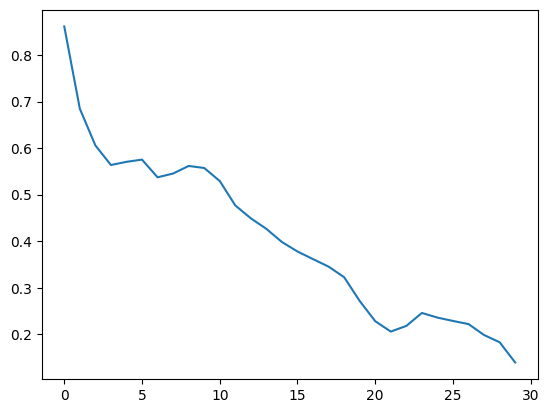

In [28]:
plt.plot(corrs)

In [ ]:
print (cor)

0.6437052287030149


## Note! you can stationarize and non-stationary data

In [ ]:
# write a function for calculating the 5-point, moving/median average of the traffic volume column

In [ ]:
def calculate_moving_average(d1, d2):

